Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Fish Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


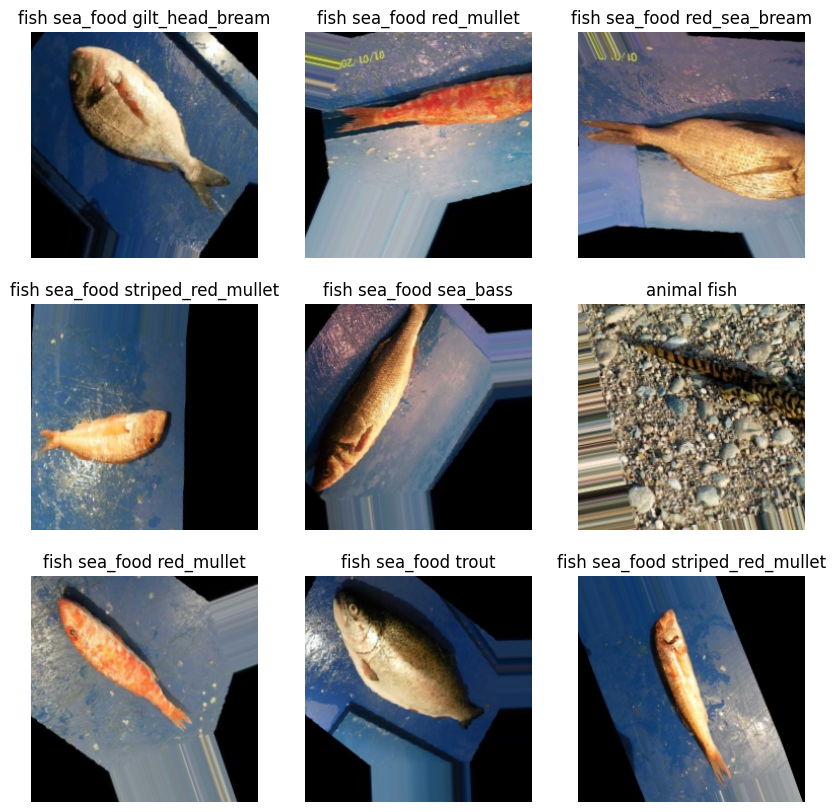

In [2]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------
# 2. Dataset Paths
# -------------------------------
train_dir = "C:/Users/HP/Desktop/kani/Data_science/guvi/Project/fishing/Dataset/data/train"
val_dir   = "C:/Users/HP/Desktop/kani/Data_science/guvi/Project/fishing/Dataset/data/val"
test_dir  = "C:/Users/HP/Desktop/kani/Data_science/guvi/Project/fishing/Dataset/data/test"

# -------------------------------
# 3. Data Augmentation & Generators
# -------------------------------
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# -------------------------------
# 4. Class Labels
# -------------------------------
class_labels = list(train_generator.class_indices.keys())
print("Fish Classes:", class_labels)
np.save("class_labels.npy", class_labels)
# -------------------------------
# 5. Sample Visualization
# -------------------------------
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(class_labels[y_batch[i].argmax()])
    plt.axis("off")
plt.show()


In [4]:
import matplotlib
print(matplotlib.__version__)


3.5.3


In [10]:
pip install tensorflow==2.9.1 --no-cache-dir --timeout=1000


  Obtaining dependency information for tensorflow==2.9.1 from https://files.pythonhosted.org/packages/af/f2/b9ebc1355c2d48c5823f9a33bfd91d885c1499846080eebc4ea21f5e509d/tensorflow-2.9.1-cp37-cp37m-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers<2,>=1.12 from https://files.pythonhosted.org/packages/eb/26/712e578c5f14e26ae3314c39a1bdc4eb2ec2f4ddc89b708cf8e0a0d20423/flatbuffers-1.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast<=0.4.0,>=0.2.1 from https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675ae


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import tensorflow as tf
print(tf.__version__)


2.9.1


In [13]:
##training from scratch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  # output layer
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save the CNN model
cnn_model.save("cnn_fish_model.h5")


Epoch 1/10
195/195 [==============================] - 448s 2s/step - loss: 1.9455 - accuracy: 0.2996 - val_loss: 1.4943 - val_accuracy: 0.5183
Epoch 2/10
195/195 [==============================] - 349s 2s/step - loss: 1.5000 - accuracy: 0.4553 - val_loss: 1.0631 - val_accuracy: 0.6200
Epoch 3/10
195/195 [==============================] - 335s 2s/step - loss: 1.1940 - accuracy: 0.5725 - val_loss: 0.9105 - val_accuracy: 0.6996
Epoch 4/10
195/195 [==============================] - 350s 2s/step - loss: 0.9570 - accuracy: 0.6596 - val_loss: 0.6456 - val_accuracy: 0.7720
Epoch 5/10
195/195 [==============================] - 333s 2s/step - loss: 0.8126 - accuracy: 0.7139 - val_loss: 0.5113 - val_accuracy: 0.8507
Epoch 6/10
195/195 [==============================] - 329s 2s/step - loss: 0.7116 - accuracy: 0.7418 - val_loss: 0.4242 - val_accuracy: 0.8773
Epoch 7/10
195/195 [==============================] - 328s 2s/step - loss: 0.6512 - accuracy: 0.7650 - val_loss: 0.3914 - val_accuracy: 0.8791

In [4]:
###Transfer Learning (Pre-trained Models)
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def build_pretrained_model(base_model_name, input_shape=(img_height, img_width, 3), num_classes=len(class_labels)):
    if base_model_name == "VGG16":
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == "MobileNet":
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == "InceptionV3":
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == "EfficientNetB0":
        from tensorflow.keras.applications import EfficientNetB0
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Invalid model name")

    # Freeze the base model
    base_model.trainable = False

    # Add custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

models_list = ["VGG16",  "InceptionV3","ResNet50", "MobileNet", "EfficientNetB0"] 

for model_name in models_list:
    print(f"\nTraining {model_name}...\n")
    model = build_pretrained_model(model_name)

    # Callbacks to save best model
    checkpoint = ModelCheckpoint(f"{model_name}_fish_model.h5", monitor='val_accuracy', 
                                 save_best_only=True, mode='max', verbose=1)
    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,  # you can increase to 15-20 if GPU allows
        callbacks=[checkpoint, early_stop]
    )


Training VGG16...

Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 2.2892 - accuracy: 0.1854  
Epoch 1: val_accuracy improved from -inf to 0.41117, saving model to VGG16_fish_model.h5
195/195 [==============================] - 17419s 90s/step - loss: 2.2892 - accuracy: 0.1854 - val_loss: 2.0283 - val_accuracy: 0.4112
Epoch 2/10
195/195 [==============================] - ETA: 0s - loss: 2.0009 - accuracy: 0.3099 
Epoch 2: val_accuracy improved from 0.41117 to 0.53114, saving model to VGG16_fish_model.h5
195/195 [==============================] - 7338s 38s/step - loss: 2.0009 - accuracy: 0.3099 - val_loss: 1.8154 - val_accuracy: 0.5311
Epoch 3/10
195/195 [==============================] - ETA: 0s - loss: 1.8087 - accuracy: 0.4122  
Epoch 3: val_accuracy improved from 0.53114 to 0.62363, saving model to VGG16_fish_model.h5
195/195 [==============================] - 34318s 177s/step - loss: 1.8087 - accuracy: 0.4122 - val_loss: 1.6435 - val_accuracy: 0.6236
Epoch 4/1

In [2]:
#### fine-tuning of trained models:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

models_list = ["InceptionV3", "EfficientNetB0"]
####"VGG16", "ResNet50","MobileNet",
for model_name in models_list:
    print(f"\n=== Fine-tuning {model_name} ===\n")

    # Load trained model
    model = load_model(f"{model_name}_fish_model.h5")

    # Unfreeze last 30% layers (skip InputLayer)
    for layer in model.layers:
        layer.trainable = False
    fine_tune_at = int(len(model.layers) * 0.7)
    for layer in model.layers[fine_tune_at:]:
        layer.trainable = True

    # Re-compile with low LR
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    checkpoint = ModelCheckpoint(f"{model_name}_fish_finetuned.h5",
                                 monitor='val_accuracy',
                                 save_best_only=True,
                                 mode='max',
                                 verbose=1)
    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # Fine-tune
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=15,
        callbacks=[checkpoint, early_stop]
    )

    print(f"✅ Fine-tuned {model_name} saved as {model_name}_fish_finetuned.h5")



=== Fine-tuning InceptionV3 ===

Epoch 1/15
195/195 [==============================] - ETA: 0s - loss: 0.7584 - accuracy: 0.7549
Epoch 1: val_accuracy improved from -inf to 0.96612, saving model to InceptionV3_fish_finetuned.h5
195/195 [==============================] - 648s 3s/step - loss: 0.7584 - accuracy: 0.7549 - val_loss: 0.1299 - val_accuracy: 0.9661
Epoch 2/15
195/195 [==============================] - ETA: 0s - loss: 0.2511 - accuracy: 0.9303
Epoch 2: val_accuracy improved from 0.96612 to 0.97253, saving model to InceptionV3_fish_finetuned.h5
195/195 [==============================] - 643s 3s/step - loss: 0.2511 - accuracy: 0.9303 - val_loss: 0.1088 - val_accuracy: 0.9725
Epoch 3/15
195/195 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9533
Epoch 3: val_accuracy improved from 0.97253 to 0.98352, saving model to InceptionV3_fish_finetuned.h5
195/195 [==============================] - 645s 3s/step - loss: 0.1749 - accuracy: 0.9533 - val_loss: 0.0805 - 

Epoch 13/15
195/195 [==============================] - ETA: 0s - loss: 2.1375 - accuracy: 0.2233
Epoch 13: val_accuracy did not improve from 0.24542
195/195 [==============================] - 428s 2s/step - loss: 2.1375 - accuracy: 0.2233 - val_loss: 2.3746 - val_accuracy: 0.1923
Epoch 14/15
195/195 [==============================] - ETA: 0s - loss: 2.1173 - accuracy: 0.2294
Epoch 14: val_accuracy did not improve from 0.24542
195/195 [==============================] - 429s 2s/step - loss: 2.1173 - accuracy: 0.2294 - val_loss: 2.2971 - val_accuracy: 0.1749
Epoch 15/15
195/195 [==============================] - ETA: 0s - loss: 2.1096 - accuracy: 0.2337
Epoch 15: val_accuracy did not improve from 0.24542
195/195 [==============================] - 431s 2s/step - loss: 2.1096 - accuracy: 0.2337 - val_loss: 2.3190 - val_accuracy: 0.1777
✅ Fine-tuned EfficientNetB0 saved as EfficientNetB0_fish_finetuned.h5


In [3]:
from tensorflow.keras.models import load_model

# Models to compare (CNN + fine-tuned only)
all_models = [
    "cnn_fish_model.h5",                # CNN from scratch
    "VGG16_fish_finetuned.h5",          # fine-tuned version
    "ResNet50_fish_finetuned.h5",       # fine-tuned version
    "MobileNet_fish_finetuned.h5",      # fine-tuned version
    "InceptionV3_fish_finetuned.h5",    # fine-tuned version
    "EfficientNetB0_fish_finetuned.h5"  # fine-tuned version
]

results_all = {}

# Evaluate all saved models on validation data
for model_file in all_models:
    try:
        print(f"\n📌 Evaluating {model_file} ...")
        model = load_model(model_file)
        val_loss, val_acc = model.evaluate(val_generator, verbose=0)
        results_all[model_file] = val_acc
        print(f"✅ {model_file} Validation Accuracy: {val_acc:.4f}")
    except Exception as e:
        print(f"⚠️ Skipping {model_file}: {e}")

# Find best one
best_model_file = max(results_all, key=results_all.get)
print("\n🏆 Final Best Model:", best_model_file, "with Accuracy:", results_all[best_model_file])

# Save best model as final_best_fish_model.h5
best_model = load_model(best_model_file)
best_model.save("final_best_fish_model.h5")
print("💾 Saved as final_best_fish_model.h5")



📌 Evaluating cnn_fish_model.h5 ...
✅ cnn_fish_model.h5 Validation Accuracy: 0.9130

📌 Evaluating VGG16_fish_finetuned.h5 ...
✅ VGG16_fish_finetuned.h5 Validation Accuracy: 0.9881

📌 Evaluating ResNet50_fish_finetuned.h5 ...
✅ ResNet50_fish_finetuned.h5 Validation Accuracy: 0.7106

📌 Evaluating MobileNet_fish_finetuned.h5 ...
✅ MobileNet_fish_finetuned.h5 Validation Accuracy: 0.9963

📌 Evaluating InceptionV3_fish_finetuned.h5 ...
✅ InceptionV3_fish_finetuned.h5 Validation Accuracy: 0.9945

📌 Evaluating EfficientNetB0_fish_finetuned.h5 ...
✅ EfficientNetB0_fish_finetuned.h5 Validation Accuracy: 0.2454

🏆 Final Best Model: MobileNet_fish_finetuned.h5 with Accuracy: 0.9963369965553284
💾 Saved as final_best_fish_model.h5


35/35 [==============================] - 257s 7s/step
--- Evaluation for VGG16_fish_finetuned.h5 ---
Accuracy : 0.1081
Precision: 0.1068
Recall   : 0.1081
F1-score : 0.1074

                                  precision    recall  f1-score   support

                     animal fish     0.1753    0.1818    0.1785       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0952    0.0952    0.0952       105
   fish sea_food gilt_head_bream     0.0745    0.0745    0.0745        94
   fish sea_food hourse_mackerel     0.1224    0.1237    0.1231        97
        fish sea_food red_mullet     0.0889    0.0889    0.0889        90
     fish sea_food red_sea_bream     0.0885    0.0885    0.0885       113
          fish sea_food sea_bass     0.0737    0.0722    0.0729        97
            fish sea_food shrimp     0.0784    0.0800    0.0792       100
fish sea_food striped_red_mullet     0.1089    0.1089    0.1089       101
           

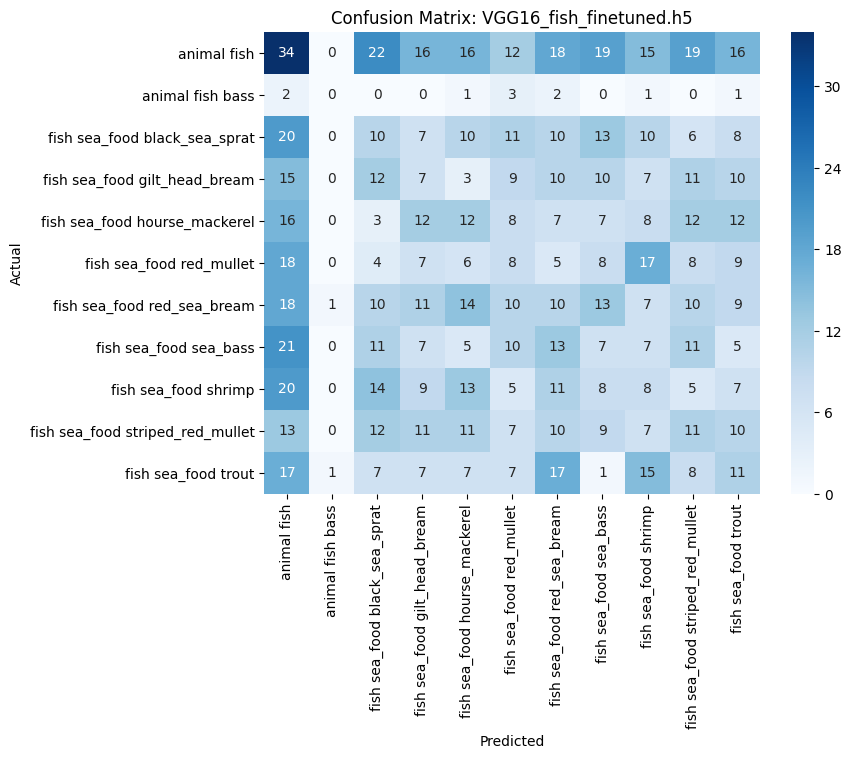

35/35 [==============================] - 97s 3s/step
--- Evaluation for ResNet50_fish_finetuned.h5 ---
Accuracy : 0.0980
Precision: 0.0925
Recall   : 0.0980
F1-score : 0.0923

                                  precision    recall  f1-score   support

                     animal fish     0.1576    0.1551    0.1563       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0959    0.0667    0.0787       105
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000        94
   fish sea_food hourse_mackerel     0.0667    0.1237    0.0866        97
        fish sea_food red_mullet     0.0885    0.1111    0.0985        90
     fish sea_food red_sea_bream     0.1354    0.1150    0.1244       113
          fish sea_food sea_bass     0.0901    0.1031    0.0962        97
            fish sea_food shrimp     0.0889    0.0800    0.0842       100
fish sea_food striped_red_mullet     0.0400    0.0099    0.0159       101
         

C:\Users\HP\anaconda3\envs\envpytorch\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\envpytorch\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


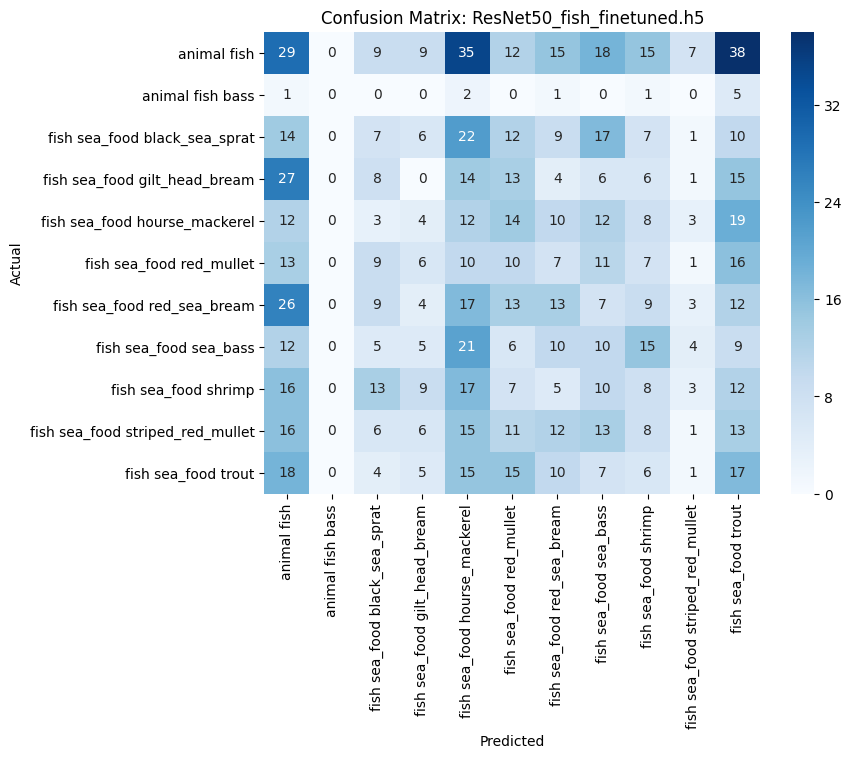

35/35 [==============================] - 25s 676ms/step
--- Evaluation for MobileNet_fish_finetuned.h5 ---
Accuracy : 0.0925
Precision: 0.0923
Recall   : 0.0925
F1-score : 0.0924

                                  precision    recall  f1-score   support

                     animal fish     0.1277    0.1283    0.1280       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0571    0.0571    0.0571       105
   fish sea_food gilt_head_bream     0.0638    0.0638    0.0638        94
   fish sea_food hourse_mackerel     0.1020    0.1031    0.1026        97
        fish sea_food red_mullet     0.0889    0.0889    0.0889        90
     fish sea_food red_sea_bream     0.0973    0.0973    0.0973       113
          fish sea_food sea_bass     0.0510    0.0515    0.0513        97
            fish sea_food shrimp     0.1800    0.1800    0.1800       100
fish sea_food striped_red_mullet     0.0800    0.0792    0.0796       101
     

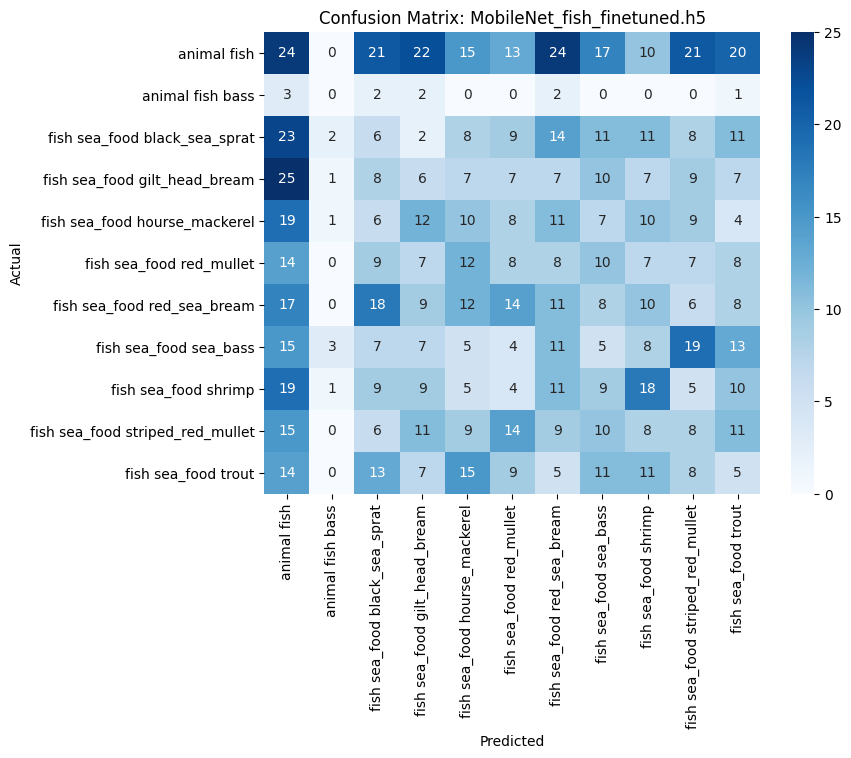

35/35 [==============================] - 61s 2s/step
--- Evaluation for InceptionV3_fish_finetuned.h5 ---
Accuracy : 0.0806
Precision: 0.0801
Recall   : 0.0806
F1-score : 0.0804

                                  precision    recall  f1-score   support

                     animal fish     0.1257    0.1283    0.1270       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0571    0.0571    0.0571       105
   fish sea_food gilt_head_bream     0.0745    0.0745    0.0745        94
   fish sea_food hourse_mackerel     0.1134    0.1134    0.1134        97
        fish sea_food red_mullet     0.0444    0.0444    0.0444        90
     fish sea_food red_sea_bream     0.0796    0.0796    0.0796       113
          fish sea_food sea_bass     0.0619    0.0619    0.0619        97
            fish sea_food shrimp     0.0500    0.0500    0.0500       100
fish sea_food striped_red_mullet     0.0495    0.0495    0.0495       101
      

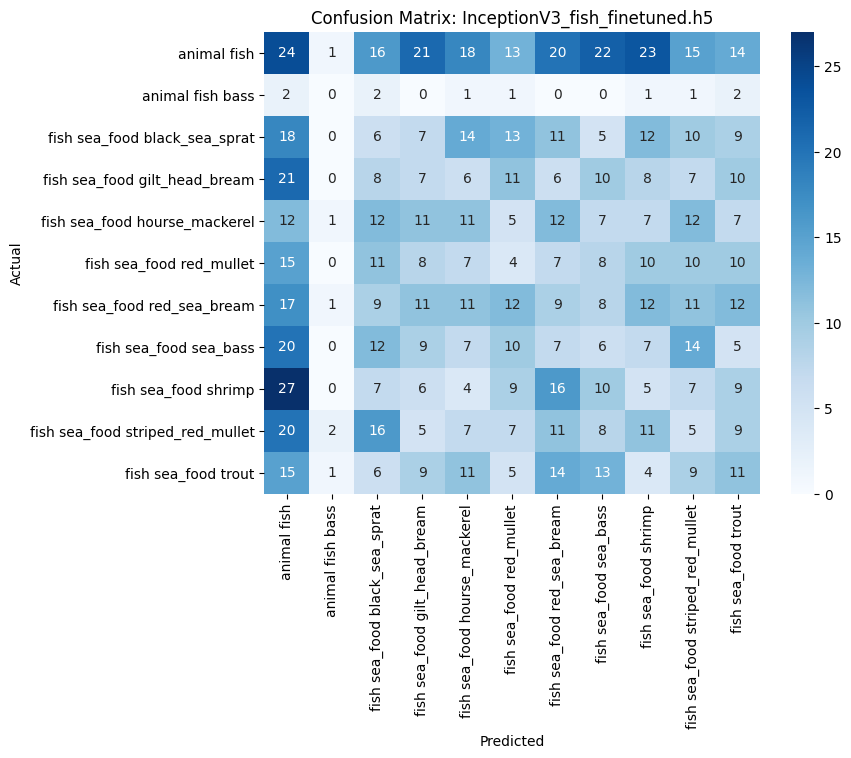

35/35 [==============================] - 50s 1s/step
--- Evaluation for EfficientNetB0_fish_finetuned.h5 ---
Accuracy : 0.1035
Precision: 0.0430
Recall   : 0.1035
F1-score : 0.0493

                                  precision    recall  f1-score   support

                     animal fish     0.1429    0.0963    0.1150       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       105
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000        94
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000        97
        fish sea_food red_mullet     0.0991    0.2556    0.1429        90
     fish sea_food red_sea_bream     0.0999    0.6372    0.1727       113
          fish sea_food sea_bass     0.0000    0.0000    0.0000        97
            fish sea_food shrimp     0.0000    0.0000    0.0000       100
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       101
   

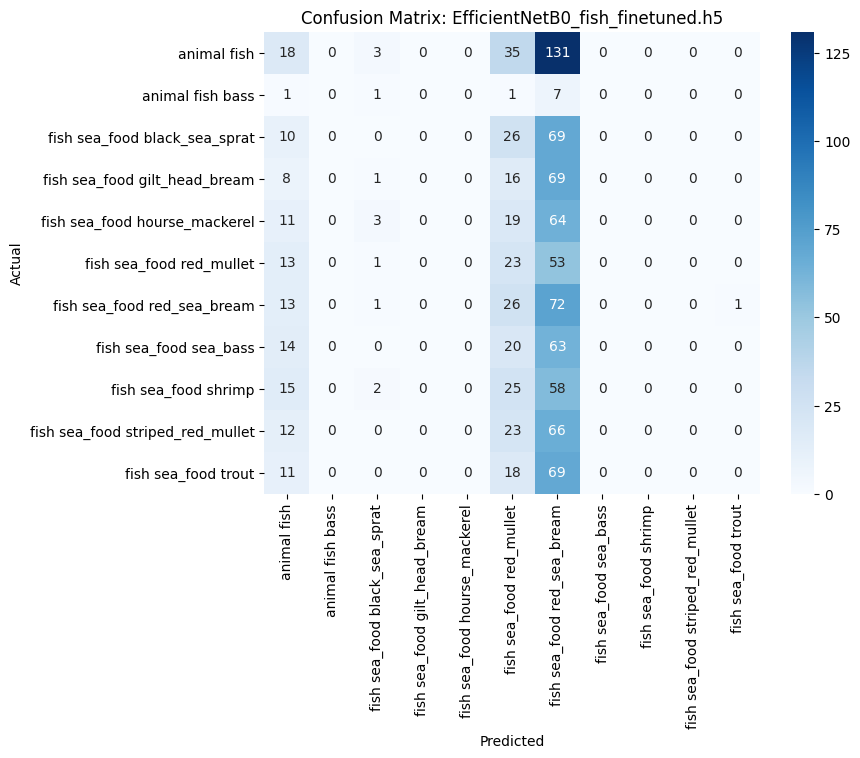

35/35 [==============================] - 14s 388ms/step
--- Evaluation for cnn_fish_model.h5 ---
Accuracy : 0.1053
Precision: 0.1033
Recall   : 0.1053
F1-score : 0.1042

                                  precision    recall  f1-score   support

                     animal fish     0.1827    0.1925    0.1875       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.1414    0.1333    0.1373       105
   fish sea_food gilt_head_bream     0.1019    0.1170    0.1089        94
   fish sea_food hourse_mackerel     0.0638    0.0619    0.0628        97
        fish sea_food red_mullet     0.0326    0.0333    0.0330        90
     fish sea_food red_sea_bream     0.0980    0.0885    0.0930       113
          fish sea_food sea_bass     0.0729    0.0722    0.0725        97
            fish sea_food shrimp     0.0980    0.1000    0.0990       100
fish sea_food striped_red_mullet     0.0532    0.0495    0.0513       101
             fi

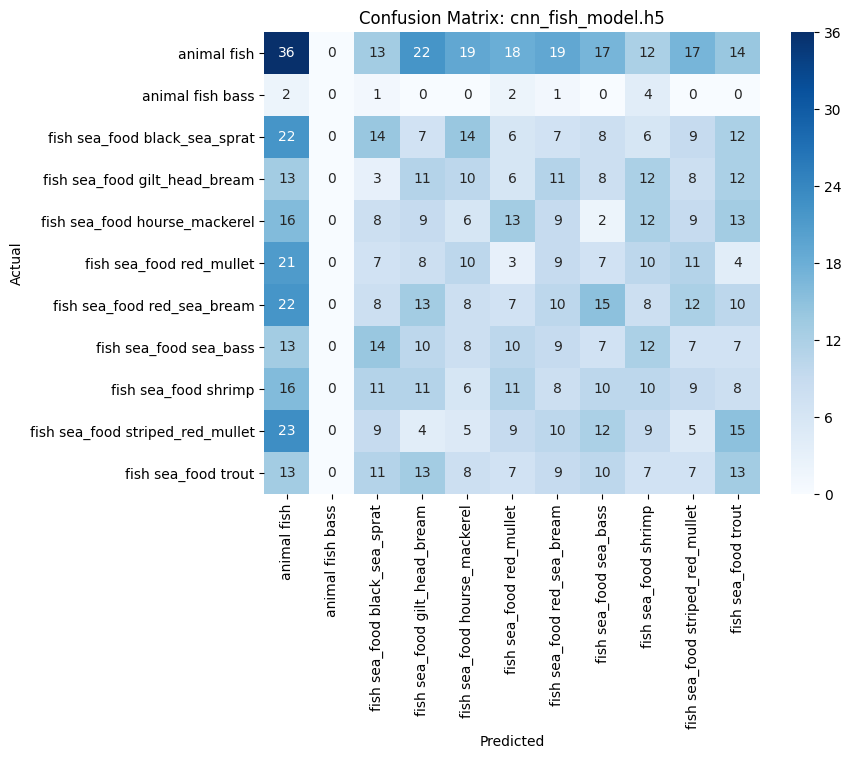


=== Model Comparison on Validation Set ===

                                  Accuracy  Precision    Recall  F1-score
VGG16_fish_finetuned.h5           0.108059   0.106814  0.108059  0.107424
ResNet50_fish_finetuned.h5        0.097985   0.092471  0.097985  0.092302
MobileNet_fish_finetuned.h5       0.092491   0.092307  0.092491  0.092398
InceptionV3_fish_finetuned.h5     0.080586   0.080126  0.080586  0.080354
EfficientNetB0_fish_finetuned.h5  0.103480   0.042968  0.103480  0.049337
cnn_fish_model.h5                 0.105311   0.103338  0.105311  0.104185


In [4]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model_path, generator, class_labels):
    # Load model
    model = load_model(model_path)
    
    # Predict
    Y_pred = model.predict(generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = generator.classes  # true labels
    
    # Metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    
    report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"--- Evaluation for {model_path} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}\n")
    print(report)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_path}')
    plt.show()
    
    return acc, precision, recall, f1, cm

# Evaluate all fine-tuned models on validation set
fine_tuned_models = [
    "VGG16_fish_finetuned.h5",
    "ResNet50_fish_finetuned.h5",
    "MobileNet_fish_finetuned.h5",
    "InceptionV3_fish_finetuned.h5",
    "EfficientNetB0_fish_finetuned.h5",
    "cnn_fish_model.h5"  # <- your custom CNN
]

results = {}

for model_file in fine_tuned_models:
    acc, precision, recall, f1, cm = evaluate_model(model_file, val_generator, class_labels)
    results[model_file] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Show summary table
import pandas as pd
results_df = pd.DataFrame(results).T
print("\n=== Model Comparison on Validation Set ===\n")
print(results_df)


In [6]:
import numpy as np
from collections import Counter

# For train
train_counts = Counter(train_generator.classes)
print("Train class distribution:", train_counts)

# For validation
val_counts = Counter(val_generator.classes)
print("Validation class distribution:", val_counts)

# For test
test_counts = Counter(test_generator.classes)
print("Test class distribution:", test_counts)

# Optional: Map index → class label
print("Class indices:", train_generator.class_indices)


Train class distribution: Counter({0: 1096, 10: 580, 5: 579, 8: 576, 4: 573, 6: 571, 2: 569, 3: 566, 9: 547, 7: 538, 1: 30})
Validation class distribution: Counter({0: 187, 6: 113, 2: 105, 9: 101, 8: 100, 10: 98, 4: 97, 7: 97, 3: 94, 5: 90, 1: 10})
Test class distribution: Counter({0: 520, 7: 327, 3: 305, 2: 298, 9: 293, 10: 292, 5: 291, 8: 289, 4: 286, 6: 273, 1: 13})
Class indices: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


100/100 [==============================] - 752s 8s/step
--- Evaluation for VGG16_fish_finetuned.h5 ---
Accuracy : 0.9922
Precision: 0.9922
Recall   : 0.9922
F1-score : 0.9906

                                  precision    recall  f1-score   support

                     animal fish     0.9810    0.9923    0.9866       520
                animal fish bass     1.0000    0.0769    0.1429        13
   fish sea_food black_sea_sprat     0.9967    1.0000    0.9983       298
   fish sea_food gilt_head_bream     0.9871    1.0000    0.9935       305
   fish sea_food hourse_mackerel     1.0000    0.9930    0.9965       286
        fish sea_food red_mullet     0.9966    0.9931    0.9948       291
     fish sea_food red_sea_bream     1.0000    0.9963    0.9982       273
          fish sea_food sea_bass     1.0000    0.9939    0.9969       327
            fish sea_food shrimp     0.9897    1.0000    0.9948       289
fish sea_food striped_red_mullet     0.9864    0.9932    0.9898       293
         

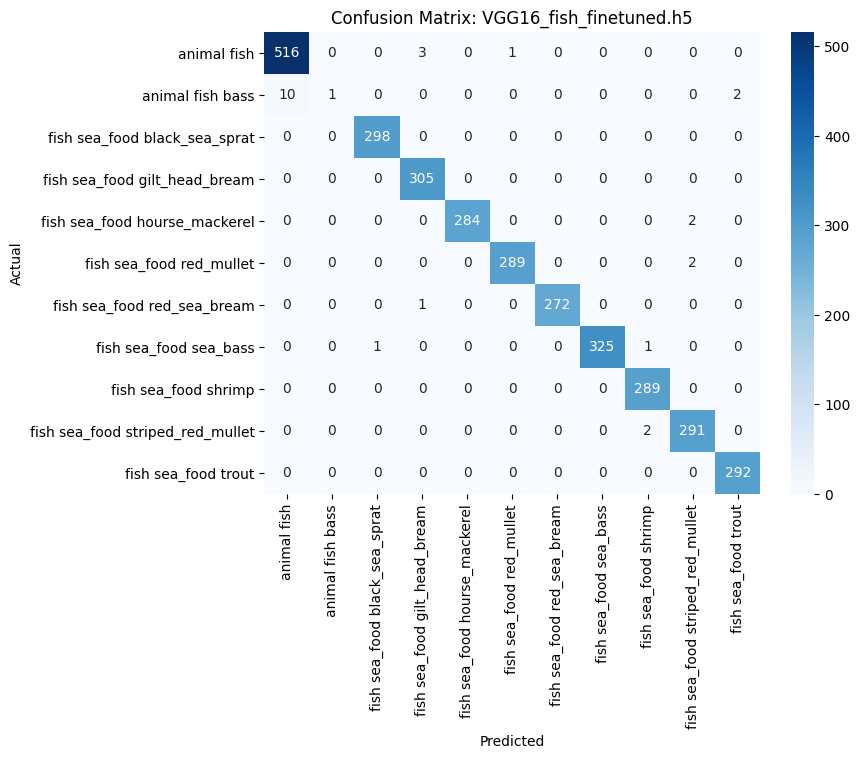

100/100 [==============================] - 293s 3s/step
--- Evaluation for ResNet50_fish_finetuned.h5 ---
Accuracy : 0.7182
Precision: 0.7613
Recall   : 0.7182
F1-score : 0.7031

                                  precision    recall  f1-score   support

                     animal fish     0.9587    0.9365    0.9475       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.8727    0.6443    0.7413       298
   fish sea_food gilt_head_bream     0.7595    0.3934    0.5184       305
   fish sea_food hourse_mackerel     0.4732    0.8322    0.6033       286
        fish sea_food red_mullet     0.6952    0.7526    0.7228       291
     fish sea_food red_sea_bream     0.8954    0.7839    0.8359       273
          fish sea_food sea_bass     0.5979    0.7003    0.6451       327
            fish sea_food shrimp     0.8801    0.8893    0.8847       289
fish sea_food striped_red_mullet     0.8254    0.1775    0.2921       293
      

C:\Users\HP\anaconda3\envs\envpytorch\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\envpytorch\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


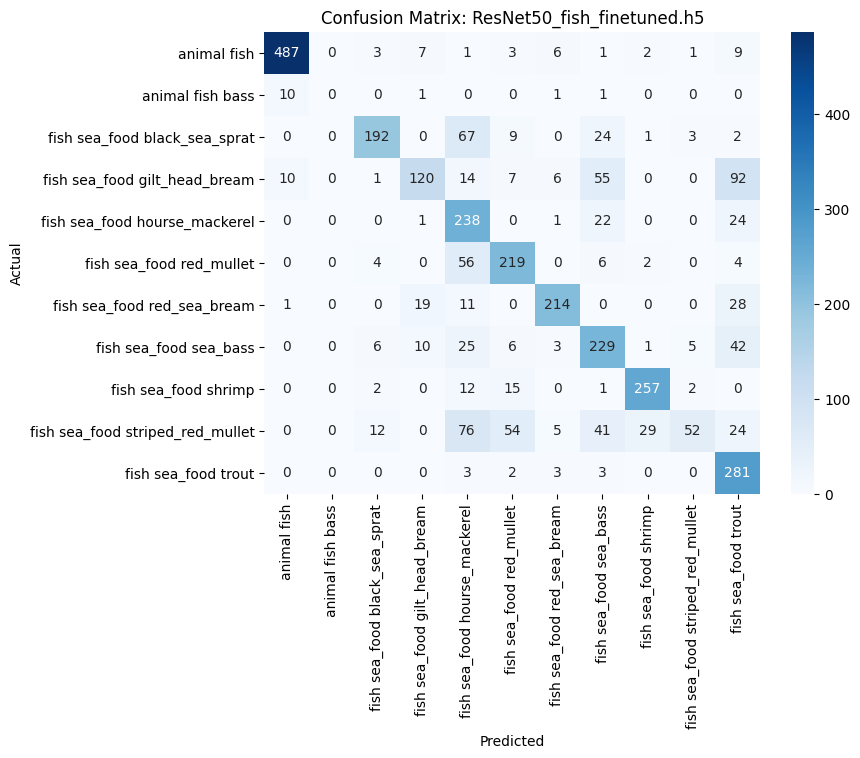

100/100 [==============================] - 75s 739ms/step
--- Evaluation for MobileNet_fish_finetuned.h5 ---
Accuracy : 0.9984
Precision: 0.9984
Recall   : 0.9984
F1-score : 0.9984

                                  precision    recall  f1-score   support

                     animal fish     0.9943    1.0000    0.9971       520
                animal fish bass     1.0000    0.7692    0.8696        13
   fish sea_food black_sea_sprat     1.0000    0.9966    0.9983       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     0.9965    1.0000    0.9983       286
        fish sea_food red_mullet     0.9966    1.0000    0.9983       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     1.0000    0.9966    0.9983       293
   

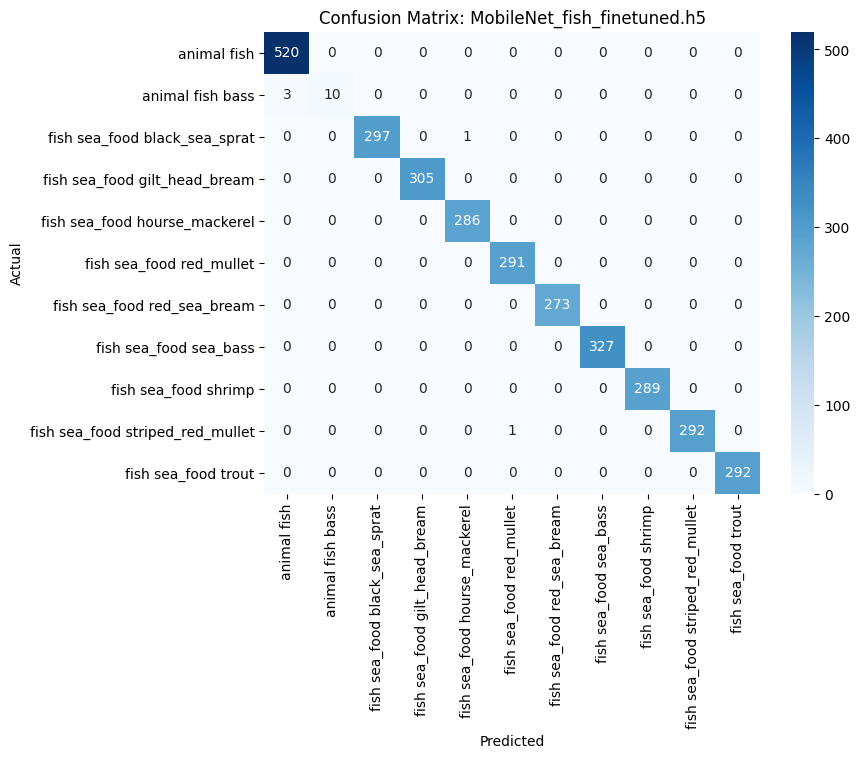

100/100 [==============================] - 177s 2s/step
--- Evaluation for InceptionV3_fish_finetuned.h5 ---
Accuracy : 0.9981
Precision: 0.9980
Recall   : 0.9981
F1-score : 0.9979

                                  precision    recall  f1-score   support

                     animal fish     0.9905    0.9981    0.9943       520
                animal fish bass     0.8889    0.6154    0.7273        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     1.0000    1.0000    1.0000       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     1.0000    1.0000    1.0000       293
   

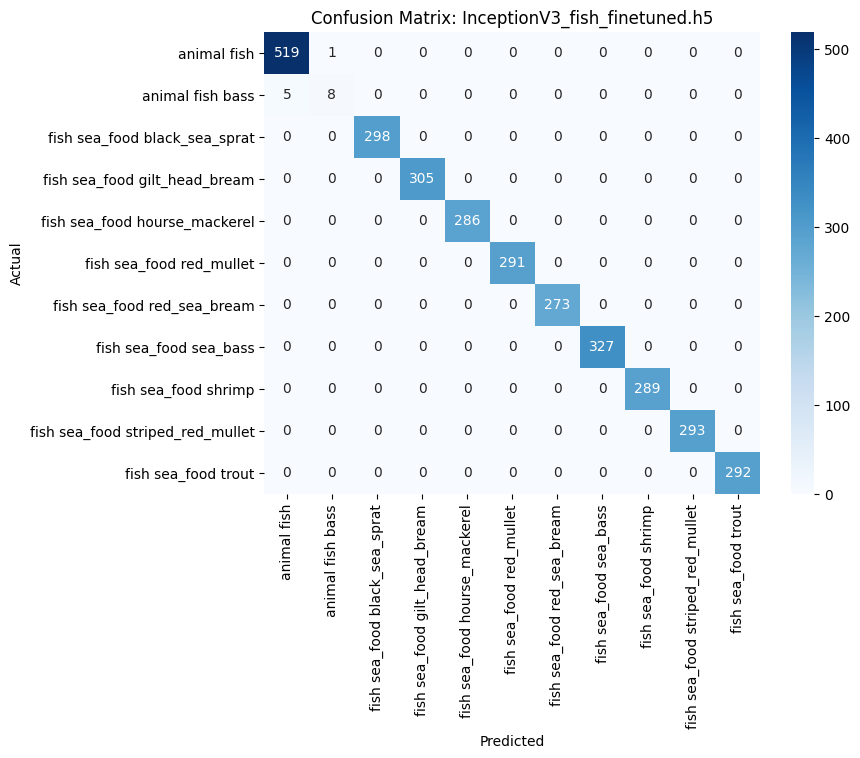

100/100 [==============================] - 147s 1s/step
--- Evaluation for EfficientNetB0_fish_finetuned.h5 ---
Accuracy : 0.2300
Precision: 0.2421
Recall   : 0.2300
F1-score : 0.1715

                                  precision    recall  f1-score   support

                     animal fish     0.9500    0.6212    0.7512       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.2126    0.5120    0.3004       291
     fish sea_food red_sea_bream     0.1220    0.9377    0.2159       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293


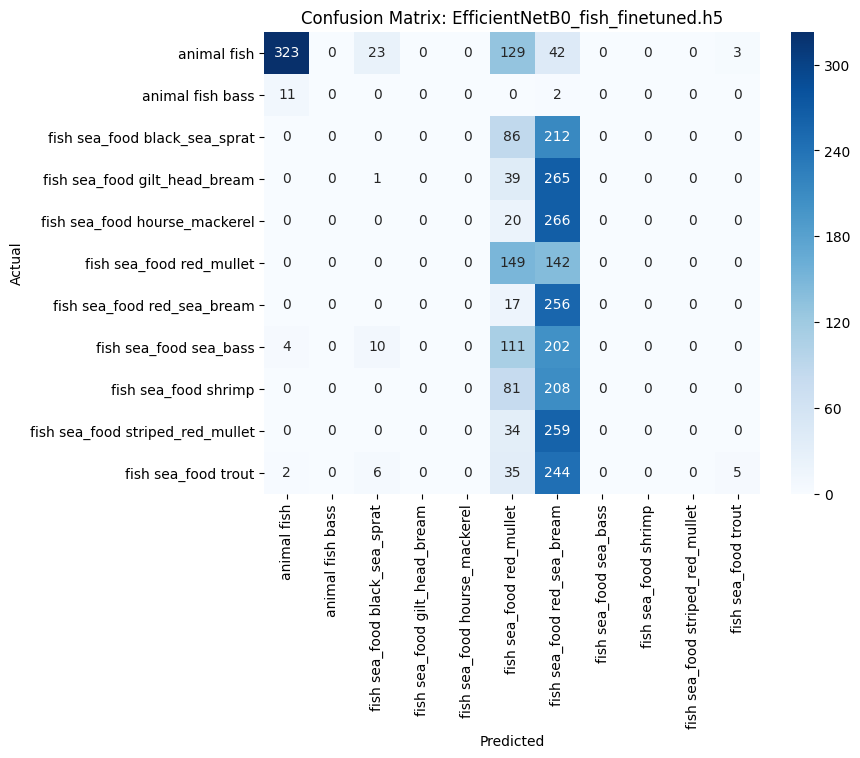

100/100 [==============================] - 41s 412ms/step
--- Evaluation for cnn_fish_model.h5 ---
Accuracy : 0.9049
Precision: 0.9059
Recall   : 0.9049
F1-score : 0.9036

                                  precision    recall  f1-score   support

                     animal fish     0.9718    0.9923    0.9819       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9786    0.9228    0.9499       298
   fish sea_food gilt_head_bream     0.6829    0.7836    0.7298       305
   fish sea_food hourse_mackerel     0.9712    0.9441    0.9574       286
        fish sea_food red_mullet     1.0000    1.0000    1.0000       291
     fish sea_food red_sea_bream     0.8834    0.7216    0.7944       273
          fish sea_food sea_bass     0.7731    0.7920    0.7825       327
            fish sea_food shrimp     0.9444    1.0000    0.9714       289
fish sea_food striped_red_mullet     1.0000    0.8942    0.9441       293
             

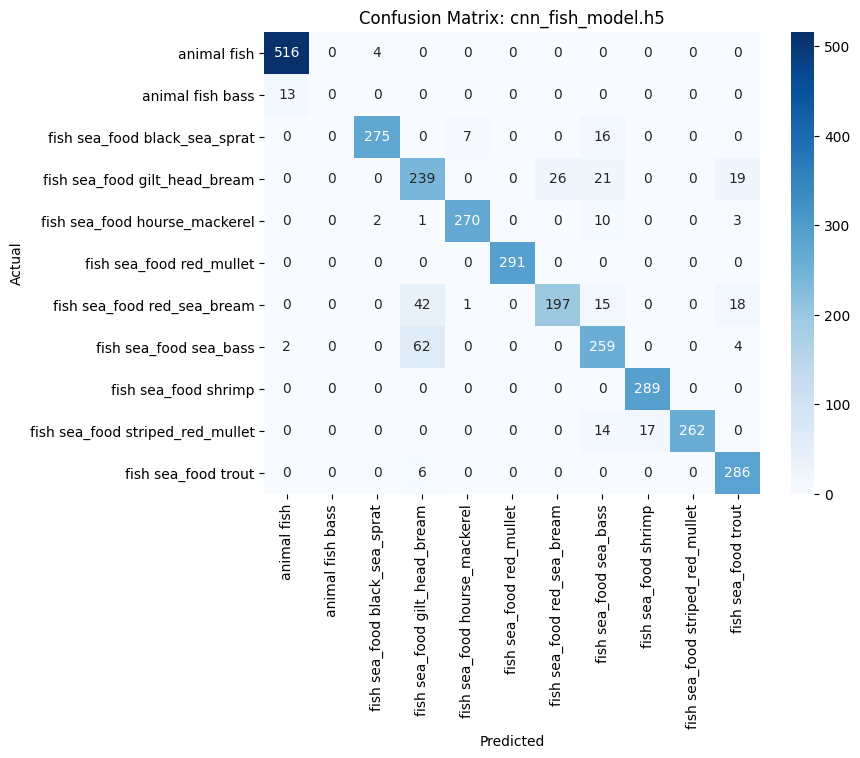


=== Model Comparison on Validation Set ===

                                  Accuracy  Precision    Recall  F1-score
VGG16_fish_finetuned.h5           0.992156   0.992230  0.992156  0.990562
ResNet50_fish_finetuned.h5        0.718230   0.761274  0.718230  0.703052
MobileNet_fish_finetuned.h5       0.998431   0.998439  0.998431  0.998371
InceptionV3_fish_finetuned.h5     0.998117   0.997990  0.998117  0.997950
EfficientNetB0_fish_finetuned.h5  0.229997   0.242129  0.229997  0.171543
cnn_fish_model.h5                 0.904926   0.905863  0.904926  0.903582


In [8]:
### test_gene
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model_path, generator, class_labels):
    # Load model
    model = load_model(model_path)
    
    # Predict
    Y_pred = model.predict(generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = generator.classes  # true labels
    
    # Metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    
    report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"--- Evaluation for {model_path} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}\n")
    print(report)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_path}')
    plt.show()
    
    return acc, precision, recall, f1, cm

# Evaluate all fine-tuned models on validation set
fine_tuned_models = [
    "VGG16_fish_finetuned.h5",
    "ResNet50_fish_finetuned.h5",
    "MobileNet_fish_finetuned.h5",
    "InceptionV3_fish_finetuned.h5",
    "EfficientNetB0_fish_finetuned.h5",
    "cnn_fish_model.h5"  # <- your custom CNN
]

results = {}

for model_file in fine_tuned_models:
    acc, precision, recall, f1, cm = evaluate_model(model_file, test_generator, class_labels)
    results[model_file] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Show summary table
import pandas as pd
results_df = pd.DataFrame(results).T
print("\n=== Model Comparison on Validation Set ===\n")
print(results_df)



=== Processing CNN From Scratch ===
Epoch 1/3
195/195 [==============================] - 436s 2s/step - loss: 0.4766 - accuracy: 0.8308 - val_loss: 0.2662 - val_accuracy: 0.9167
Epoch 2/3
195/195 [==============================] - 343s 2s/step - loss: 0.4596 - accuracy: 0.8414 - val_loss: 0.2890 - val_accuracy: 0.9194
Epoch 3/3
195/195 [==============================] - 346s 2s/step - loss: 0.4239 - accuracy: 0.8527 - val_loss: 0.3937 - val_accuracy: 0.8480


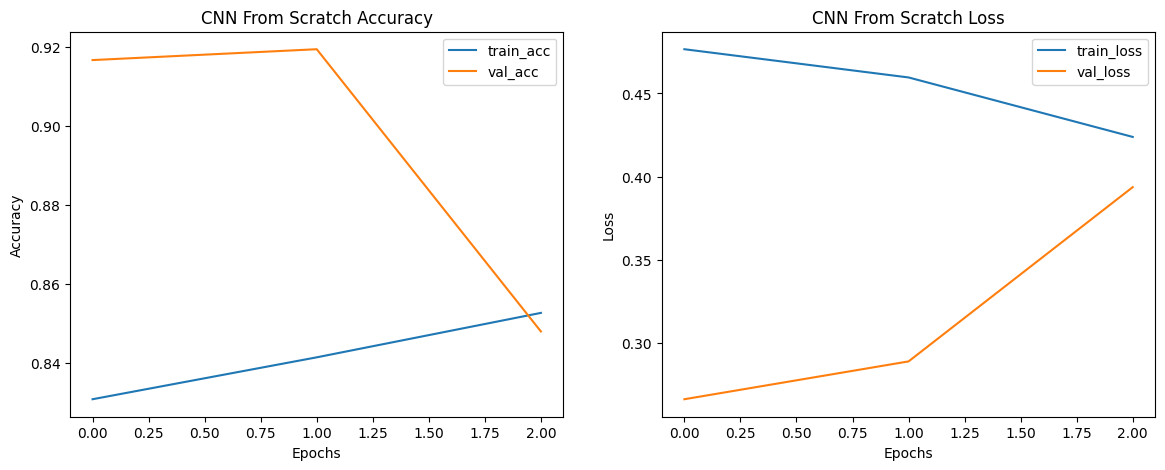


=== Processing VGG16 Fine-Tuned ===
Epoch 1/3
195/195 [==============================] - 2276s 12s/step - loss: 2.9722 - accuracy: 0.1672 - val_loss: 2.3276 - val_accuracy: 0.1712
Epoch 2/3
195/195 [==============================] - 2262s 12s/step - loss: 2.3096 - accuracy: 0.1761 - val_loss: 2.3109 - val_accuracy: 0.1712
Epoch 3/3
195/195 [==============================] - 2267s 12s/step - loss: 2.3002 - accuracy: 0.1761 - val_loss: 2.3097 - val_accuracy: 0.1712


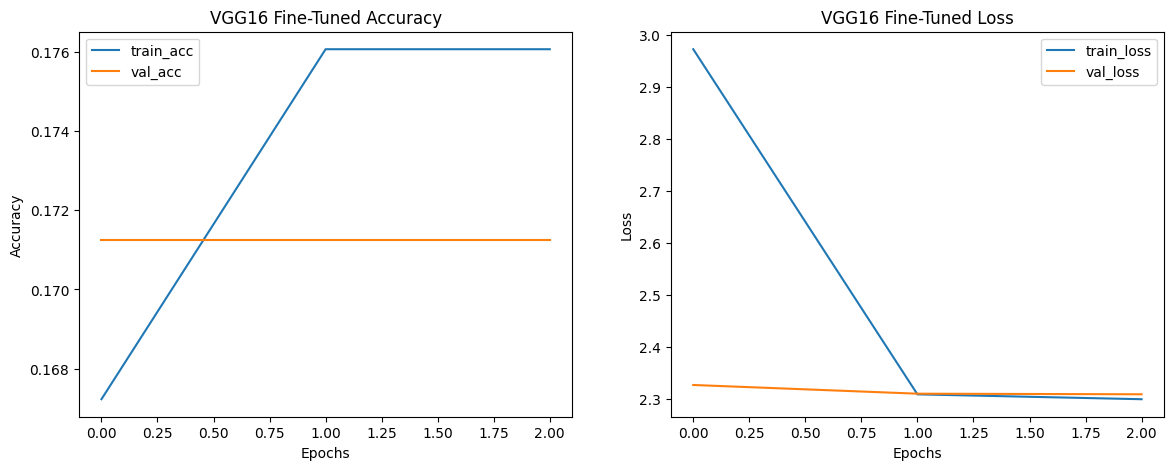


=== Processing MobileNet Fine-Tuned ===
Epoch 1/3
195/195 [==============================] - 267s 1s/step - loss: 0.1399 - accuracy: 0.9584 - val_loss: 0.0797 - val_accuracy: 0.9762
Epoch 2/3
195/195 [==============================] - 264s 1s/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0502 - val_accuracy: 0.9853
Epoch 3/3
195/195 [==============================] - 264s 1s/step - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0417 - val_accuracy: 0.9899


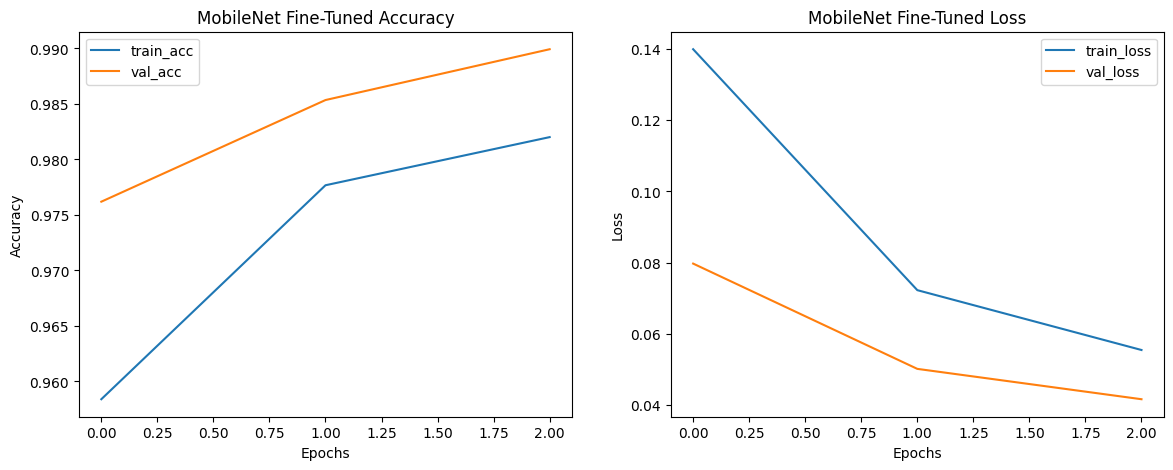


=== Processing InceptionV3 Fine-Tuned ===
Epoch 1/3
195/195 [==============================] - 424s 2s/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0328 - val_accuracy: 0.9918
Epoch 2/3
195/195 [==============================] - 415s 2s/step - loss: 0.0395 - accuracy: 0.9863 - val_loss: 0.0225 - val_accuracy: 0.9936
Epoch 3/3
195/195 [==============================] - 415s 2s/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0199 - val_accuracy: 0.9963


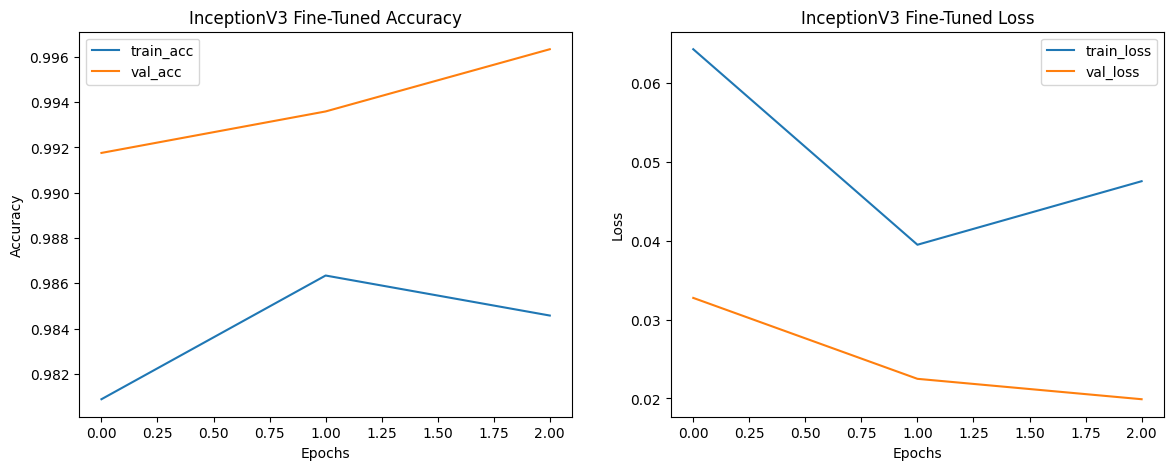

In [12]:
# -------------------------------
# Training History Visualization (Loop)
# -------------------------------
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def plot_training_history(history, model_name):
    """
    Plots accuracy and loss curves for a single model
    """
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# -------------------------------
# Models to visualize
# -------------------------------
models_dict = {
    "CNN From Scratch": "cnn_fish_model.h5",
    "VGG16 Fine-Tuned": "VGG16_fish_finetuned.h5",
    "MobileNet Fine-Tuned": "MobileNet_fish_finetuned.h5",
    "InceptionV3 Fine-Tuned": "InceptionV3_fish_finetuned.h5"
}

histories = {}

for name, model_obj in models_dict.items():
    print(f"\n=== Processing {name} ===")
    
    # If string → pretrained model path, load model
    if isinstance(model_obj, str):
        model = load_model(model_obj)
        
        # Optional: unfreeze last few layers for short retrain
        for layer in model.layers[:-10]:
            layer.trainable = False
        for layer in model.layers[-10:]:
            layer.trainable = True
        
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Short retrain for history
        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=3
        )
    else:
        # CNN model already in memory
        history = model_obj.fit(
            train_generator,
            validation_data=val_generator,
            epochs=3
        )
    
    histories[name] = history
    plot_training_history(history, name)
